<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_4)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.214716,89.097401,45.022614,0.000088,187.334818,187.334819,-6.649113e-07
1,0.0,1.0,23.583159,57.657239,25.031872,0.000133,116.272403,116.272383,1.980854e-05
2,0.0,2.0,95.903262,77.582717,76.887929,-0.000097,260.373811,260.373875,-6.467227e-05
3,0.0,3.0,39.347241,98.434866,34.787201,-0.000058,182.569250,182.569441,-1.909155e-04
4,0.0,4.0,39.020170,74.975299,84.620550,0.000131,208.616150,208.615967,1.826618e-04
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.929733,71.524697,95.979605,0.000043,251.434078,251.434345,-2.675213e-04
19996,999.0,16.0,57.644976,62.694131,94.351564,-0.000349,224.690322,224.691014,-6.926051e-04
19997,999.0,17.0,53.118121,75.325633,33.474803,-0.000165,171.918391,171.918038,3.536220e-04
19998,999.0,18.0,87.972854,32.866994,44.971649,-0.000143,175.811355,175.811842,-4.874309e-04


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.214716,89.097401,45.022614,0.000088,187.334818,187.334819,-6.649113e-07
1,0.0,1.0,23.583159,57.657239,25.031872,0.000133,116.272403,116.272383,1.980854e-05
2,0.0,2.0,95.903262,77.582717,76.887929,-0.000097,260.373811,260.373875,-6.467227e-05
3,0.0,3.0,39.347241,98.434866,34.787201,-0.000058,182.569250,182.569441,-1.909155e-04
4,0.0,4.0,39.020170,74.975299,84.620550,0.000131,208.616150,208.615967,1.826618e-04
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.929733,71.524697,95.979605,0.000043,251.434078,251.434345,-2.675213e-04
19996,999.0,16.0,57.644976,62.694131,94.351564,-0.000349,224.690322,224.691014,-6.926051e-04
19997,999.0,17.0,53.118121,75.325633,33.474803,-0.000165,171.918391,171.918038,3.536220e-04
19998,999.0,18.0,87.972854,32.866994,44.971649,-0.000143,175.811355,175.811842,-4.874309e-04


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    43.214716  89.097401  ...  187.334819 -6.649113e-07
      1.0    23.583159  57.657239  ...  116.272383  1.980854e-05
      2.0    95.903262  77.582717  ...  260.373875 -6.467227e-05
      3.0    39.347241  98.434866  ...  182.569441 -1.909155e-04
      4.0    39.020170  74.975299  ...  208.615967  1.826618e-04
...                ...        ...  ...         ...           ...
999.0 15.0   73.929733  71.524697  ...  251.434345 -2.675213e-04
      16.0   57.644976  62.694131  ...  224.691014 -6.926051e-04
      17.0   53.118121  75.325633  ...  171.918038  3.536220e-04
      18.0   87.972854  32.866994  ...  175.811842 -4.874309e-04
      19.0   63.744100  45.889395  ...  178.672743 -5.356294e-04

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    43.214716  89.097401  ...  187.334819 -6.649113e-07
      1.0    23.583159  57.657239  ...  116.272383  1.980854e-05
      2.0    95.903262  77.582717  ...  260.373875 -6.467227e-05
      3.0    39.347241  98.434866  ...  182.569441 -1.909155e-04
      4.0    39.020170  74.975299  ...  208.615967  1.826618e-04
...                ...        ...  ...         ...           ...
999.0 15.0   73.929733  71.524697  ...  251.434345 -2.675213e-04
      16.0   57.644976  62.694131  ...  224.691014 -6.926051e-04
      17.0   53.118121  75.325633  ...  171.918038  3.536220e-04
      18.0   87.972854  32.866994  ...  175.811842 -4.874309e-04
      19.0   63.744100  45.889395  ...  178.672743 -5.356294e-04

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,43.214716,89.097401,45.022614,0.000088,187.334818,187.334819,-6.649113e-07
1,0.0,1.0,23.583159,57.657239,25.031872,0.000133,116.272403,116.272383,1.980854e-05
2,0.0,2.0,95.903262,77.582717,76.887929,-0.000097,260.373811,260.373875,-6.467227e-05
3,0.0,3.0,39.347241,98.434866,34.787201,-0.000058,182.569250,182.569441,-1.909155e-04
4,0.0,4.0,39.020170,74.975299,84.620550,0.000131,208.616150,208.615967,1.826618e-04
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,73.929733,71.524697,95.979605,0.000043,251.434078,251.434345,-2.675213e-04
19996,999.0,16.0,57.644976,62.694131,94.351564,-0.000349,224.690322,224.691014,-6.926051e-04
19997,999.0,17.0,53.118121,75.325633,33.474803,-0.000165,171.918391,171.918038,3.536220e-04
19998,999.0,18.0,87.972854,32.866994,44.971649,-0.000143,175.811355,175.811842,-4.874309e-04


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    43.214716  89.097401  ...  187.334819 -6.649113e-07
      1.0    23.583159  57.657239  ...  116.272383  1.980854e-05
      2.0    95.903262  77.582717  ...  260.373875 -6.467227e-05
      3.0    39.347241  98.434866  ...  182.569441 -1.909155e-04
      4.0    39.020170  74.975299  ...  208.615967  1.826618e-04
...                ...        ...  ...         ...           ...
999.0 15.0   73.929733  71.524697  ...  251.434345 -2.675213e-04
      16.0   57.644976  62.694131  ...  224.691014 -6.926051e-04
      17.0   53.118121  75.325633  ...  171.918038  3.536220e-04
      18.0   87.972854  32.866994  ...  175.811842 -4.874309e-04
      19.0   63.744100  45.889395  ...  178.672743 -5.356294e-04

[20000 rows x 7 columns]

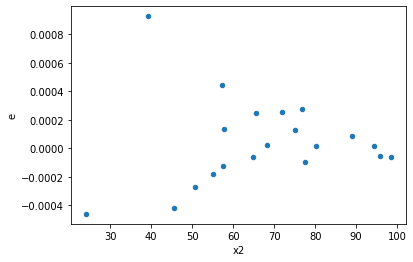

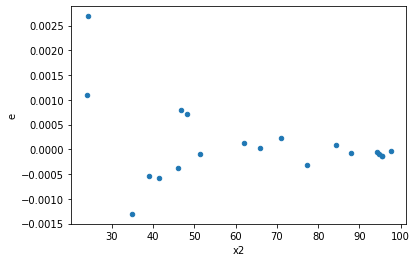

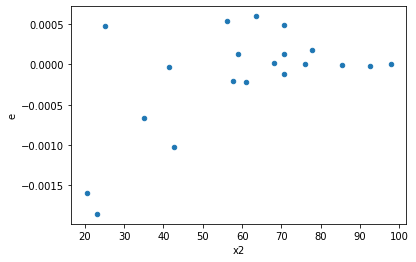

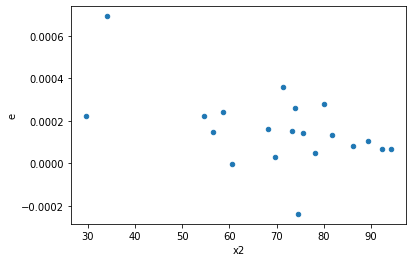

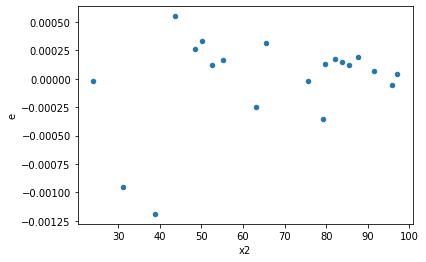

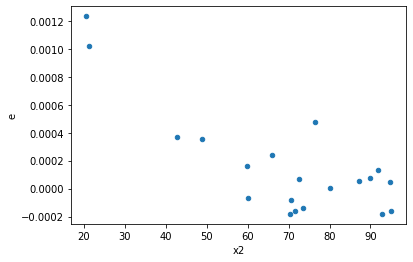

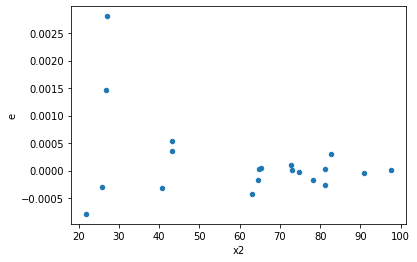

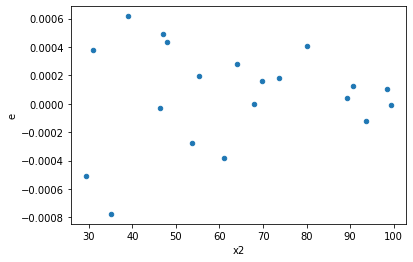

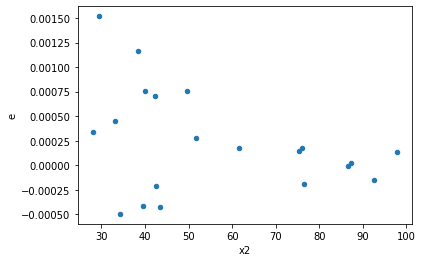

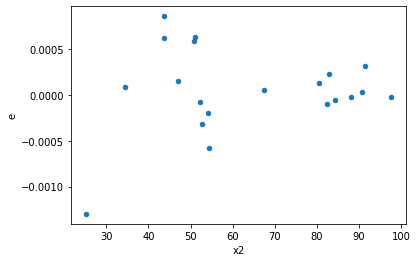

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
70.0,5.0,5.0,8.686808462171123e-08,1.2965431413462358e-07,1.7373616924342247e-08,2.5930862826924717e-08,1.4925425684154965,0.6710439884795321,0.664478005760234,0.33552199423976603,Reject001=1 : Homoscedasticity
387.0,5.0,5.0,1.7119180425368787e-07,2.1330316446274082e-07,3.423836085073757e-08,4.2660632892548166e-08,1.2459893474026855,0.8151797473204461,0.592410126339777,0.40758987366022303,Reject001=1 : Homoscedasticity
491.0,5.0,5.0,2.409983125333826e-07,2.4290131789681704e-07,4.819966250667652e-08,4.8580263579363406e-08,1.007896343104771,0.993323786466739,0.5033381067666305,0.4966618932333695,Reject001=1 : Homoscedasticity
981.0,5.0,5.0,3.6676016292008476e-07,5.478972445729319e-07,7.335203258401695e-08,1.0957944891458637e-07,1.4938842872428213,0.6703537233528709,0.6648231383235645,0.33517686167643546,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1.0185877152231992e-06,5.719914019700518e-08,2.0371754304463984e-07,1.1439828039401036e-08,0.05615534071552331,0.00668323674276786,Reject001=0 : Heteroscedasticity
1.0,5.0,5.0,5.261432198339717e-06,5.7361379660133445e-08,1.0522864396679434e-06,1.1472275932026688e-08,0.010902236786066395,0.00012972035699983765,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,1.8014860673113219e-06,1.0774197495466071e-07,3.602972134622644e-07,2.154839499093214e-08,0.0598072762868842,0.007728041852075539,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,1.0191851187508579e-07,2.9296646628512e-08,2.0383702375017157e-08,5.8593293257024e-09,0.28745167182600545,0.1974482581294564,Reject001=1 : Homoscedasticity
4.0,5.0,5.0,8.674753991591739e-07,9.50028704295211e-09,1.7349507983183477e-07,1.900057408590422e-09,0.010951650101156235,0.0001311723423440721,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,1.5169610951523099e-07,6.718971433029284e-08,3.0339221903046196e-08,1.3437942866058567e-08,0.4429231213971686,0.39231257287780874,Reject001=1 : Homoscedasticity
6.0,5.0,5.0,1.7524460823023772e-06,1.5334800302362395e-07,3.5048921646047546e-07,3.066960060472479e-08,0.08750511902891422,0.01826113122512914,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,1.6016704671463099e-06,6.939570290225146e-08,3.20334093429262e-07,1.3879140580450293e-08,0.043327079025121513,0.003649839366866109,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,2.2612410128317836e-06,5.4647642093239705e-08,4.522482025663567e-07,1.0929528418647941e-08,0.024167101951155442,0.0009059284608506767,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    724
Reject001=1 : Homoscedasticity      276
Name: Result_test, dtype: int64